In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

## Loading and Manipulating the Data

In [2]:
df_players = pd.read_csv("players_21.csv")

In [3]:
df_players.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       'league_name', 'league_rank', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur',
       'player_tags', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',


In [4]:
df = df_players[['short_name', 'club_name', 'overall', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing','attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [5]:
df.head()

,short_name,club_name,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,FC Barcelona,93,85,95,70,91,88,96,93,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,Juventus,92,84,95,90,82,86,88,81,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,Atlético Madrid,91,13,11,15,43,13,12,13,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,FC Bayern München,91,71,94,85,84,89,85,79,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,Paris Saint-Germain,91,85,87,62,87,87,95,88,...,90,92,93,30,29,9,9,15,15,11


In [6]:
# refine to only the players worth caring about
df = df[df['club_name'] == 'Tottenham Hotspur']
df.head()

,short_name,club_name,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
21,H. Kane,Tottenham Hotspur,88,75,94,85,81,85,80,80,...,83,90,91,36,38,8,10,11,14,11
36,H. Lloris,Tottenham Hotspur,87,13,10,10,50,11,10,11,...,30,40,65,10,18,89,82,68,84,90
46,H. Son,Tottenham Hotspur,87,81,86,68,83,81,88,85,...,83,73,88,34,33,11,13,13,6,10
87,T. Alderweireld,Tottenham Hotspur,85,64,45,82,79,38,62,63,...,62,58,86,89,85,16,6,14,16,14
147,S. Bergwijn,Tottenham Hotspur,83,78,77,60,84,75,87,78,...,80,68,77,28,26,11,14,12,14,13


In [7]:
# save names for later and drop them, also drop the league
names = df['short_name'].to_list()
df = df.drop(['short_name', 'club_name'], axis=1)
df.head(3)

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
21,88,75,94,85,81,85,80,80,68,83,...,83,90,91,36,38,8,10,11,14,11
36,87,13,10,10,50,11,10,11,10,50,...,30,40,65,10,18,89,82,68,84,90
46,87,81,86,68,83,81,88,85,70,70,...,83,73,88,34,33,11,13,13,6,10


## Normalize/rescale the data

In [8]:
from sklearn import preprocessing

x = df.values                           # store dataframe as a NumPy array
scaler = preprocessing.MinMaxScaler()   # initialize min max scaler
x_scaled = scaler.fit_transform(x)      # fit the scaler to the values
X_norm = pd.DataFrame(x_scaled)         # store it back in the DataFrame



## Principal Component Analysis (PCA)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # reduce to 2 columns
df_pca = pd.DataFrame(pca.fit_transform(X_norm)) # apply to the data

## K-means clustering

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)       # initialize KMC that finds 4 clusters
kmeans = kmeans.fit(df_pca)        # fit the model to the data
centroid = kmeans.cluster_centers_  # get centroid location of each cluster
clusters = kmeans.labels_.tolist()  # get cluster each row belongs to


## Create new DF

In [11]:
df_pca['cluster'] = clusters
df_pca['name'] = names
df_pca.columns = ['x', 'y', 'cluster', 'name']
df_pca.head()

,x,y,cluster,name
0,-1.090011,0.851220,2,H. Kane
1,2.801477,0.780257,1,H. Lloris
2,-1.009539,1.097980,2,H. Son
3,-0.496971,-0.506383,0,T. Alderweireld
4,-0.662474,1.006779,2,S. Bergwijn


## Visualisation

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

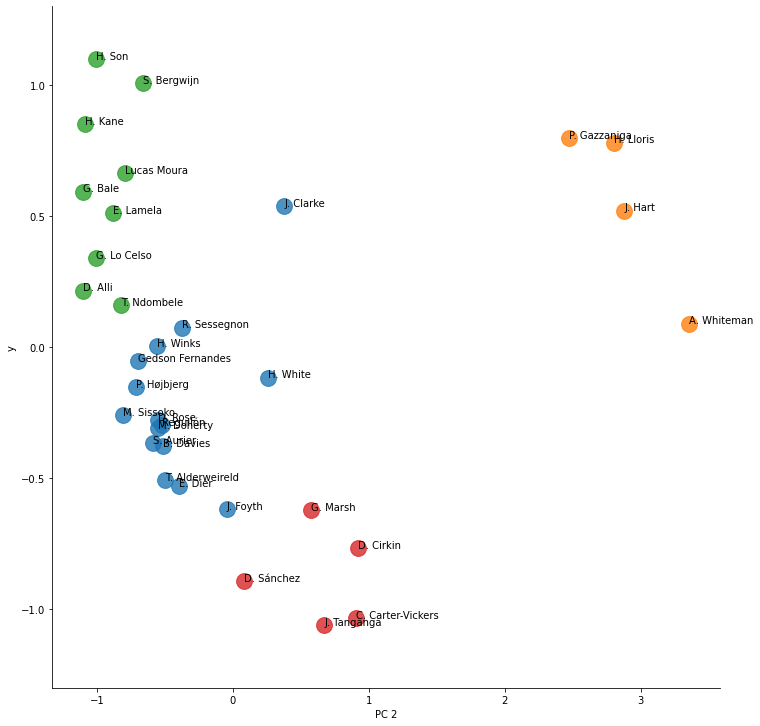

In [13]:
ax = sns.lmplot(x='x', y='y', hue='cluster', data=df_pca, legend=False, fit_reg=False, height=10, scatter_kws={"s":250})

labels = []
for x, y, s in zip(df_pca.x, df_pca.y, df_pca.name):
    labels.append(plt.text(x,y,s))

ax.set(ylim=(-1.3,1.3))
plt.xlabel("PC 1")
plt.xlabel("PC 2")

plt.show()